In [2]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import statsmodels.api as sm

/Users/karlaruggaber/Desktop/HSG/Semester3/Statistik für Data Science/Projekt/Statistik-Datenbank/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
# Load the latest version
ds = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "malaiarasugraj/global-health-statistics","Global Health Statistics.csv")


Text(0.5, 1.0, 'Histogramm + KDE: Mortality Rate (%)')

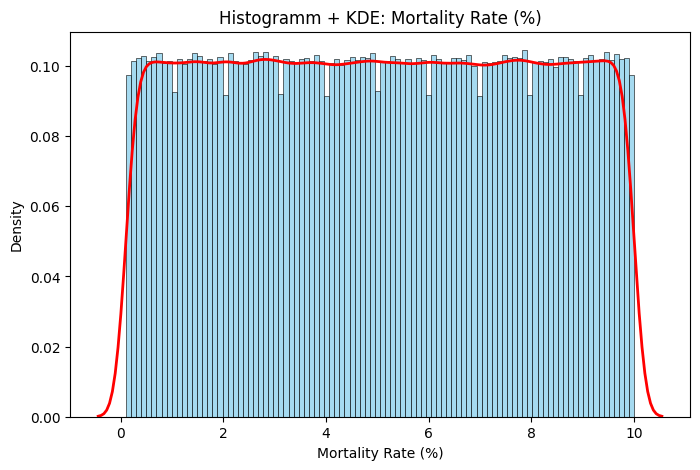

In [6]:
x = ds["Mortality Rate (%)"].dropna()

plt.figure(figsize=(8,5))
sns.histplot(x, bins="fd", stat="density", color="skyblue", edgecolor="black")
sns.kdeplot(x, color="red", lw=2, bw_adjust=1.0)
plt.title("Histogramm + KDE: Mortality Rate (%)")

Text(0.5, 1.0, 'Boxplot: Mortality Rate (%) nach Gender')

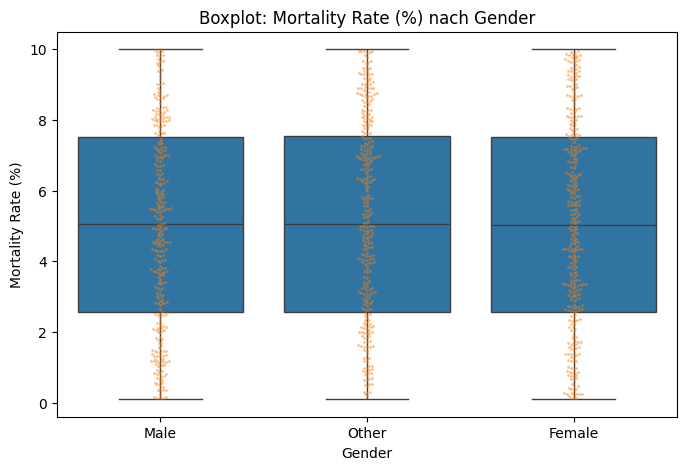

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=ds, x="Gender", y="Mortality Rate (%)", whis=1.5)
sns.swarmplot(
    data=ds.sample(1000, random_state=42),
    x="Gender", y="Mortality Rate (%)",
    size=2, alpha=0.5
)
plt.title("Boxplot: Mortality Rate (%) nach Gender")

Text(0.5, 1.0, 'Boxplot: DALYs nach Region')

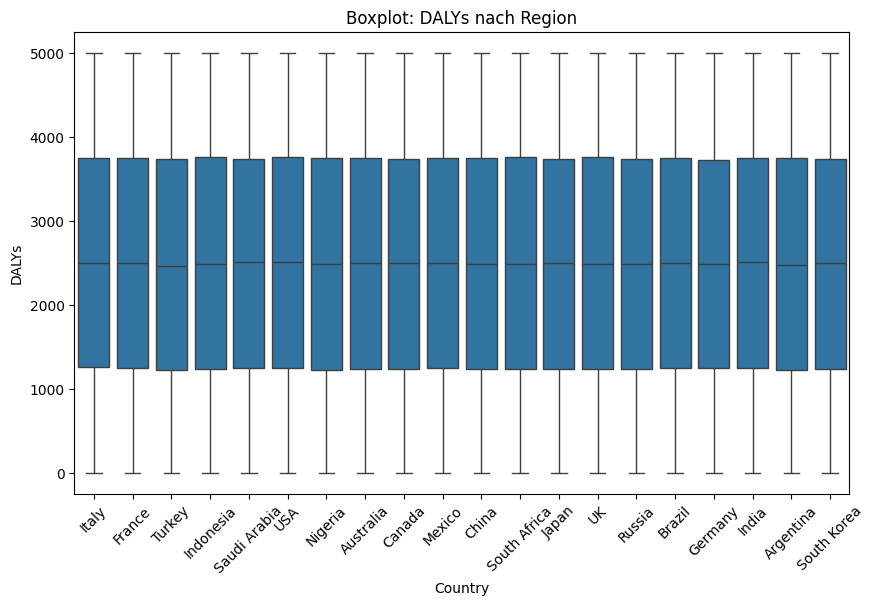

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ds, x="Country", y="DALYs", whis=1.5)
plt.xticks(rotation=45)
plt.title("Boxplot: DALYs nach Region")

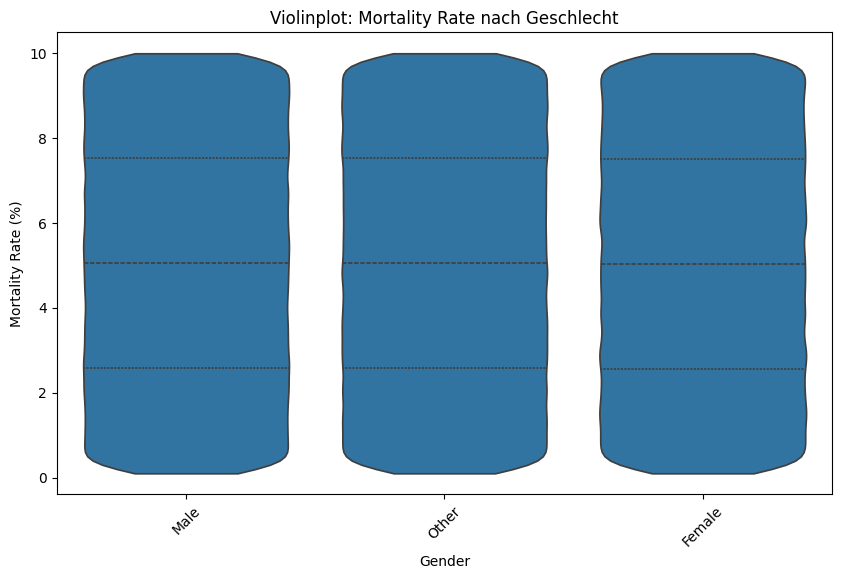

In [4]:
plt.figure(figsize=(10,6))
sns.violinplot(data=ds, x="Gender", y="Mortality Rate (%)", inner="quartile", cut=0, bw_adjust=1.0)
plt.xticks(rotation=45)
plt.title("Violinplot: Mortality Rate nach Geschlecht")
plt.show()

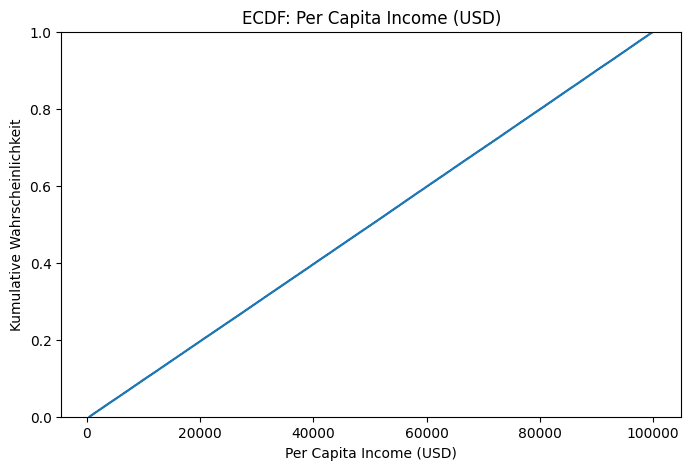

In [ ]:
plt.figure(figsize=(8,5))
sns.ecdfplot(data=ds, x="Per Capita Income (USD)")
plt.title("ECDF: Per Capita Income (USD)")
plt.xlabel("Per Capita Income (USD)")
plt.ylabel("Kumulative Wahrscheinlichkeit")

/var/folders/d7/0j6dg7256ms0w8n1z48lk8hc0000gn/T/ipykernel_33687/3087149827.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')


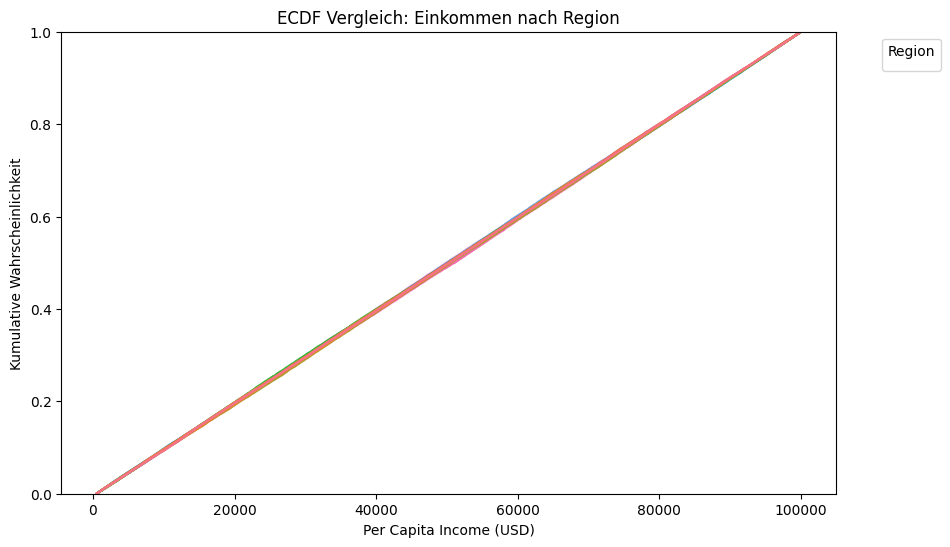

In [32]:
plt.figure(figsize=(10,6))
sns.ecdfplot(data=ds, x="Per Capita Income (USD)", hue="Country")
plt.title("ECDF Vergleich: Einkommen nach Region")
plt.xlabel("Per Capita Income (USD)")
plt.ylabel("Kumulative Wahrscheinlichkeit")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

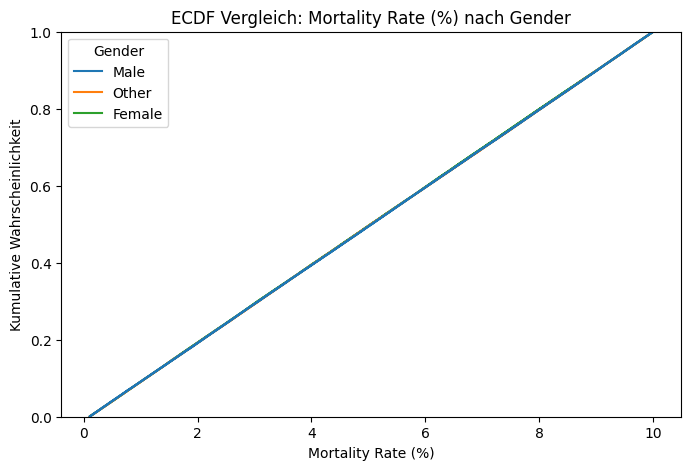

In [33]:
plt.figure(figsize=(8,5))
sns.ecdfplot(data=ds, x="Mortality Rate (%)", hue="Gender")
plt.title("ECDF Vergleich: Mortality Rate (%) nach Gender")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Kumulative Wahrscheinlichkeit")
plt.show()

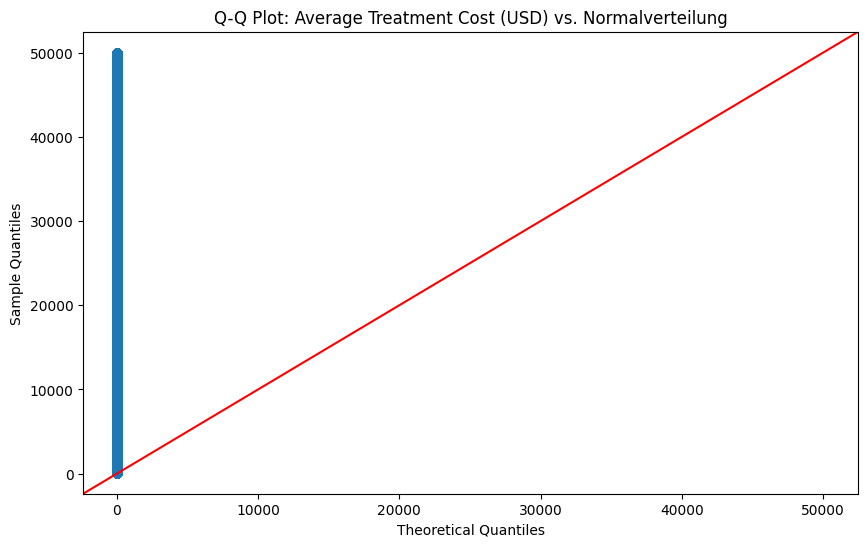

In [37]:
# Variable auswählen
s = ds["Average Treatment Cost (USD)"].dropna()

# QQ-Plot gegen Normalverteilung
sm.qqplot(s, line="45")
plt.title("Q-Q Plot: Average Treatment Cost (USD) vs. Normalverteilung")
plt.show()

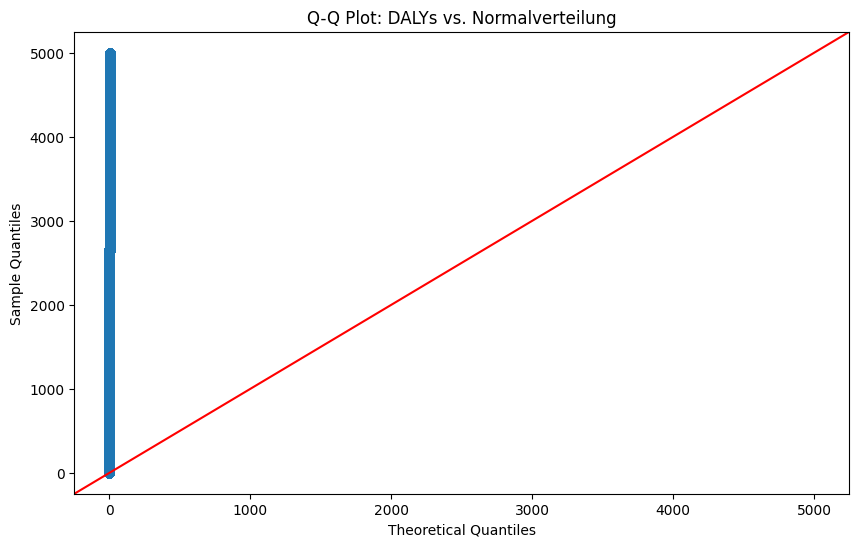

In [39]:
# Variable auswählen
s = ds["DALYs"].dropna()

# QQ-Plot gegen Normalverteilung
sm.qqplot(s, line="45")
plt.title("Q-Q Plot: DALYs vs. Normalverteilung")
plt.show()

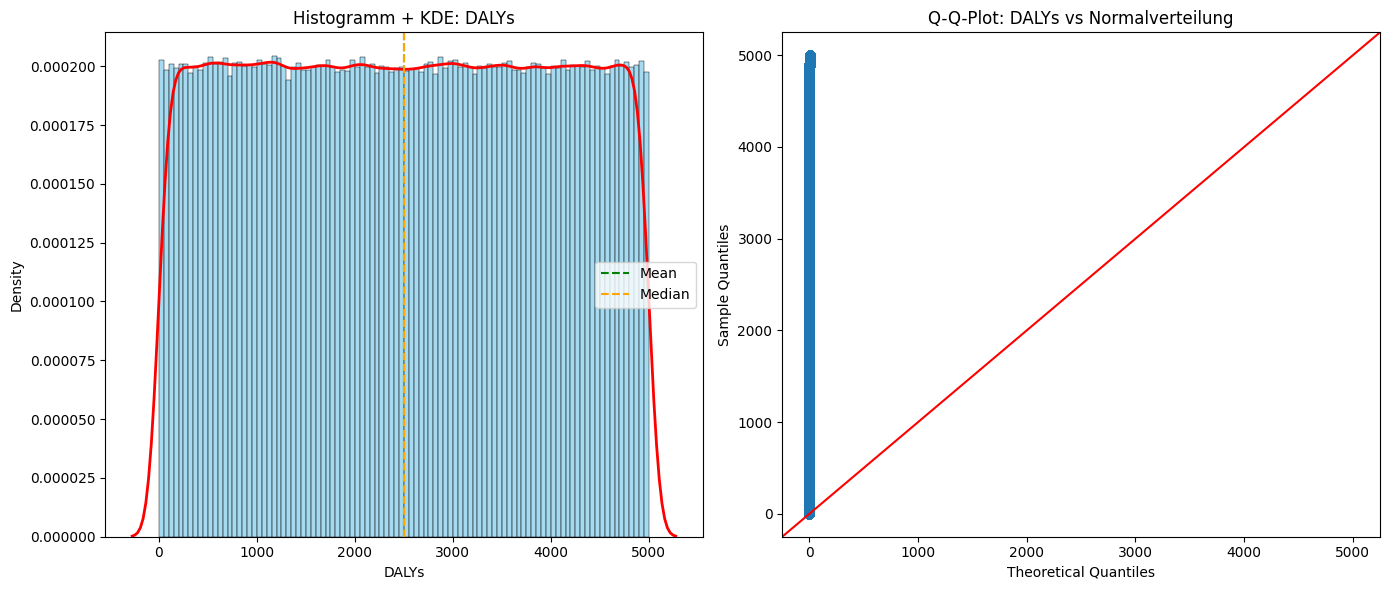

In [40]:
# Variable auswählen
var = "DALYs"
s = ds[var].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# 1. Histogramm + KDE
sns.histplot(s, bins="fd", stat="density", color="skyblue", edgecolor="black", ax=axes[0])
sns.kdeplot(s, color="red", lw=2, ax=axes[0])
axes[0].axvline(s.mean(), color="green", linestyle="--", label="Mean")
axes[0].axvline(s.median(), color="orange", linestyle="--", label="Median")
axes[0].set_title(f"Histogramm + KDE: {var}")
axes[0].legend()

# 2. Q-Q-Plot
sm.qqplot(s, line="45", ax=axes[1])
axes[1].set_title(f"Q-Q-Plot: {var} vs Normalverteilung")

plt.tight_layout()
plt.show()